# 12 Useful Pandas Techniques in Python for Data Manipulation

Link: http://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/?utm_source=feedburner&utm_medium=email&utm_campaign=Feed%3A+AnalyticsVidhya+%28Analytics+Vidhya%29%E3%80%82

## Introduction

Python is fast becoming the preferred language for data scientists - and for good reasons. It provides the larger ecosystem of a programming language and the depth of good scientific computation libraries. If you are starting to learn Python, have a look at learning path on Python.  

Among its scientific computation libraries, I found **Pandas** to be the most useful for data science operations. Pandas, along with Scikit-learn provides almost the entire stack needed by a data scientist. **This article focuses on providing 12 ways for data manipulation in Python.** I've also shared some tips & tricks which will allow you to work faster.  

I would recommend that you look at the codes for data exploration before going ahead. To help you understand better, I’ve taken a data set to perform these operations and manipulations.  

**Data Set**: I’ve used the data set of Loan Prediction problem.

## Let’s get started

I’ll start by importing modules and loading the data set into Python environment:

In [59]:
import pandas as pd
import numpy as np
data = pd.read_csv("train.csv", index_col="Loan_ID")

data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 43.2+ KB


## 1 – Boolean Indexing

**What do you do, if you want to filter values of a column based on conditions from another set of columns?**  

For instance, we want a list of all females who are not graduate and got a loan. Boolean indexing can help here.   

You can use the following code:

In [3]:
data.loc[(data["Gender"]=="Female") & (data["Education"]=="Not Graduate") & (data["Loan_Status"]=="Y"), ["Gender","Education","Loan_Status"]]

,Gender,Education,Loan_Status
Loan_ID,,,
LP001155,Female,Not Graduate,Y
LP001669,Female,Not Graduate,Y
LP001692,Female,Not Graduate,Y
LP001908,Female,Not Graduate,Y
LP002300,Female,Not Graduate,Y
LP002314,Female,Not Graduate,Y
LP002407,Female,Not Graduate,Y
LP002489,Female,Not Graduate,Y
LP002502,Female,Not Graduate,Y


** .loc is primarily label based, but may also be used with a boolean array.**  

** .iloc is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array.**

Read More: [Pandas Selecting and Indexing](http://pandas.pydata.org/pandas-docs/stable/indexing.html)

## 2 - Apply Function

It is one of the commonly used functions for playing with data and creating new variables. Apply returns some value after passing each row/column of a data frame with some function. The function can be both default or user-defined. For instance, here it can be used to find the #missing values in each row and column.

In [4]:
#Create a new function:
def num_missing(x):
    return sum(x.isnull())

In [5]:
#Applying per column:
print "Missing values per column:"
print data.apply(num_missing, axis = 0) #axis=0 defines that function is to be applied on each column

Missing values per column:
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [6]:
#Applying per row:
print "\nMissing values per row:"
print data.apply(num_missing, axis=1).head() #axis=1 defines that function is to be applied on each row


Missing values per row:
Loan_ID
LP001002    1
LP001003    0
LP001005    0
LP001006    0
LP001008    0
dtype: int64


Read More: [Pandas apply](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html#pandas.DataFrame.apply)

## 3 – Imputing missing files

**fillna() does it in one go.** It is used for updating missing values with the overall mean/mode/median of the column.  
  
Let’s impute the ‘Gender’, ‘Married’ and ‘Self_Employed’ columns with their respective modes.

In [8]:
#First we import a function to determine the mode
from scipy.stats import mode
mode(data['Gender'])

C:\Users\Chuang\Anaconda2\lib\site-packages\scipy\stats\stats.py:257: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)
C:\Users\Chuang\Anaconda2\lib\site-packages\numpy\lib\arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


ModeResult(mode=array(['Male'], dtype=object), count=array([489]))

In [9]:
#We will take the first one by default always using:
mode(data['Gender']).mode[0]

'Male'

In [10]:
#Impute the values:
data['Gender'].fillna(mode(data['Gender']).mode[0], inplace=True)

data['Married'].fillna(mode(data['Married']).mode[0], inplace=True)

data['Self_Employed'].fillna(mode(data['Self_Employed']).mode[0], inplace=True)

#Now check the #missing values again to confirm:
print data.apply(num_missing, axis=0)

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


## 4 – Pivot Table

Pandas can be used to create MS Excel style pivot tables. For instance, in this case, a key column is “LoanAmount” which has missing values. We can impute it using mean amount of each ‘Gender’, ‘Married’ and ‘Self_Employed’ group. The mean ‘LoanAmount’ of each group can be determined as:

In [11]:
#Determine pivot table
impute_grps = data.pivot_table(values=["LoanAmount"], index=["Gender","Married","Self_Employed"], aggfunc=np.mean)
print impute_grps

                              LoanAmount
Gender Married Self_Employed            
Female No      No             114.691176
               Yes            125.800000
       Yes     No             134.222222
               Yes            282.250000
Male   No      No             129.936937
               Yes            180.588235
       Yes     No             153.882736
               Yes            169.395833


More: [Pandas Reference (Pivot Table)](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot_table.html#pandas.DataFrame.pivot_table)

## 5 – Multi-Indexing

If you notice the output of step #4, it has a strange property. Each index is made up of a combination of 3 values. This is called Multi-Indexing. It helps in performing operations really fast.  

Continuing the example from #3, we have the values for each group but they have not been imputed.
This can be done using the various techniques learned till now.

In [13]:
#iterate only through rows with missing LoanAmount
for i, row in data.loc[data['LoanAmount'].isnull(),:].iterrows():
    ind = tuple([row['Gender'],row['Married'],row['Self_Employed']])
    data.loc[i,'LoanAmount'] = impute_grps.loc[ind].values[0]

#Now check the #missing values again to confirm:
print data.apply(num_missing, axis=0)

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [17]:
tuple(['Female','No','No'])

('Female', 'No', 'No')

In [20]:
impute_grps.loc[tuple(['Female','No','No'])].values[0]

114.69117647058823

Notes:

1. Using pivot table to impute the missing values;
2. Multi-index requires tuple for defining groups of indices in loc statement. This a tuple used in function.
3. The .values[0] suffix is required because, by default a series element is returned which has an index not matching with that of the dataframe. 

## 6. Crosstab

This function is used to get an initial “feel” (view) of the data. Here, we can validate some basic hypothesis.   
For instance, in this case, “Credit_History” is expected to affect the loan status significantly.   
This can be tested using cross-tabulation as shown below:

In [21]:
pd.crosstab(data["Credit_History"],data["Loan_Status"],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,192,422,614


These are absolute numbers. But, percentages can be more intuitive in making some quick insights. We can do this using the apply function:

In [22]:
def percConvert(ser):
    return ser/float(ser[-1])

In [23]:
crosstab_data = pd.crosstab(data["Credit_History"],data["Loan_Status"],margins=True)

crosstab_data.apply(percConvert, axis=1)

Loan_Status,N,Y,All
Credit_History,,,
0.0,0.921348,0.078652,1.0
1.0,0.204211,0.795789,1.0
All,0.312704,0.687296,1.0


Now, it is evident that people with a credit history have much higher chances of getting a loan as 80% people with credit history got a loan as compared to only 9% without credit history.

Read More: [Pandas Reference (crosstab)](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.crosstab.html)

## 7 – Merge DataFrames

Merging dataframes become essential when we have information coming from different sources to be collated. Consider a hypothetical case where the average property rates (INR per sq meters) is available for different property types. Let’s define a dataframe as:

In [27]:
prop_rates = pd.DataFrame([1000, 5000, 12000], index=['Rural','Semiurban','Urban'],columns=['rates'])
prop_rates

,rates
Rural,1000
Semiurban,5000
Urban,12000


In [28]:
data_merged = data.merge(right=prop_rates, how='inner',left_on='Property_Area',right_index=True, sort=False)

data_merged.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,rates
Loan_ID,,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,129.936937,360.0,1.0,Urban,Y,12000
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,12000
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,12000
LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,12000
LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y,12000


In [33]:
data_merged.pivot_table(values='Credit_History',index=['Property_Area','rates'], aggfunc=len)

Property_Area  rates
Rural          1000     179.0
Semiurban      5000     233.0
Urban          12000    202.0
Name: Credit_History, dtype: float64

The pivot table validates successful merge operation. Note that the ‘values’ argument is irrelevant here because we are simply counting the values.

ReadMore: [Pandas Reference (merge)](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html#pandas.DataFrame.merge)

## 8 – Sorting DataFrames

In [35]:
data_sorted = data.sort_values(['ApplicantIncome','CoapplicantIncome'], ascending=False)
data_sorted[['ApplicantIncome','CoapplicantIncome']].head(10)

,ApplicantIncome,CoapplicantIncome
Loan_ID,,
LP002317,81000,0.0
LP002101,63337,0.0
LP001585,51763,0.0
LP001536,39999,0.0
LP001640,39147,4750.0
LP002422,37719,0.0
LP001637,33846,0.0
LP001448,23803,0.0
LP002624,20833,6667.0


More: [Pandas Reference (sort_values)](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values)

## 9 – Plotting (Boxplot & Histogram)

Many of you might be unaware that boxplots and histograms can be directly plotted in Pandas and calling matplotlib separately is not necessary. It’s just a 1-line command. For instance, if we want to compare the distribution of ApplicantIncome by Loan_Status:

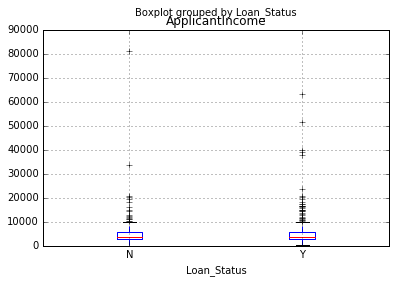

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

data.boxplot(column="ApplicantIncome",by="Loan_Status")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x08818BB0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x08A14810>], dtype=object)

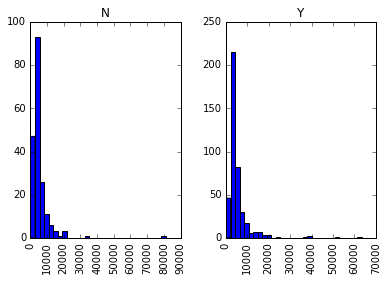

In [37]:
data.hist(column="ApplicantIncome",by="Loan_Status",bins=30)

Read More: [Pandas Reference (hist)](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html#pandas.DataFrame.hist) | [Pandas Reference (boxplot)](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html#pandas.DataFrame.boxplot)

## 10 – Cut function for binning

Sometimes numerical values make more sense if clustered together. For example, if we’re trying to model traffic (#cars on road) with time of the day (minutes). The exact minute of an hour might not be that relevant for predicting traffic as compared to actual period of the day like “Morning”, “Afternoon”, “Evening”, “Night”, “Late Night”. Modeling traffic this way will be more intuitive and will avoid overfitting.  

Here we define a simple function which can be re-used for binning any variable fairly easily.

In [38]:
#Binning:
def binning(col, cut_points, labels=None):
    #Define min and max values:
    minval = col.min()
    maxval = col.max()

    #create list by adding min and max to cut_points
    break_points = [minval] + cut_points + [maxval]

    #if no labels provided, use default labels 0 ... (n-1)
    if not labels:
        labels = range(len(cut_points)+1)

    #Binning using cut function of pandas
    colBin = pd.cut(col,bins = break_points,labels = labels, include_lowest=True)
    return colBin

In [39]:
#Binning:
cut_points = [90,140,190]
labels = ["low","medium","high","very high"]

data["LoanAmount_Bin"] = binning(data["LoanAmount"], cut_points, labels)
print pd.value_counts(data["LoanAmount_Bin"], sort=False)

low          104
medium       273
high         146
very high     91
dtype: int64


Read More: [Pandas Reference (cut)](http://pandas.pydata.org/pandas-docs/version/0.17.1/generated/pandas.cut.html)

## 11– Coding nominal data

Often, we find a case where we’ve to modify the categories of a nominal variable. This can be due to various reasons:

1. Some algorithms (like Logistic Regression) require all inputs to be numeric. So nominal variables are mostly coded as 0, 1….(n-1)
2. Sometimes a category might be represented in 2 ways. For e.g. temperature might be recorded as “High”, “Medium”, “Low”, “H”, “low”. Here, both “High” and “H” refer to same category. Similarly, in “Low” and “low” there is only a difference of case. But, python would read them as different levels.
3. Some categories might have very low frequencies and its generally a good idea to combine them.

Here I’ve defined a generic function which takes in input as a dictionary and codes the values using ‘replace’ function in Pandas.

In [41]:
#Define a generic function using Pandas replace function
def coding(col, codeDict):
    colCoded = pd.Series(col, copy=True)
    for key, value in codeDict.items():
        colCoded.replace(key, value, inplace=True)
    return colCoded

In [42]:
#Coding LoanStatus as Y=1, N=0:
print 'Before Coding:'
print pd.value_counts(data["Loan_Status"])

data["Loan_Status_Coded"] = coding(data["Loan_Status"], {'N':0,'Y':1})
print '\nAfter Coding:'
print pd.value_counts(data["Loan_Status_Coded"])

Before Coding:
Y    422
N    192
Name: Loan_Status, dtype: int64

After Coding:
1    422
0    192
Name: Loan_Status_Coded, dtype: int64


Read More:[ Pandas Reference (replace)](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.replace.html#pandas.DataFrame.replace)

## 12 – Iterating over rows of a dataframe

This is not a frequently used operation. Still, you don’t want to get stuck. Right? At times you may need to iterate through all rows using a for loop. For instance, one common problem we face is the incorrect treatment of variables in Python. This generally happens when:

1. Nominal variables with numeric categories are treated as numerical.
2. Numeric variables with characters entered in one of the rows (due to a data error) are considered categorical.  
So it’s generally a good idea to manually define the column types. If we check the data types of all columns:

In [43]:
#Check current type:
data.dtypes

Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area          object
Loan_Status            object
LoanAmount_Bin       category
Loan_Status_Coded       int64
dtype: object

Here we see that Credit_History is a nominal variable but appearing as float. A good way to tackle such issues is to create a csv file with column names and types. This way, we can make a generic function to read the file and assign column data types. 

In [44]:
#Load the file:
colTypes = pd.read_csv('datatypes.csv')
print colTypes

              feature         type
0             Loan_ID  categorical
1              Gender  categorical
2             Married  categorical
3          Dependents  categorical
4           Education  categorical
5       Self_Employed  categorical
6     ApplicantIncome   continuous
7   CoapplicantIncome   continuous
8          LoanAmount   continuous
9    Loan_Amount_Term   continuous
10     Credit_History  categorical
11      Property_Area  categorical
12        Loan_Status  categorical


In [46]:
#delet 'Loan_ID'
colTypes = colTypes[colTypes.feature != 'Loan_ID']
print colTypes

              feature         type
1              Gender  categorical
2             Married  categorical
3          Dependents  categorical
4           Education  categorical
5       Self_Employed  categorical
6     ApplicantIncome   continuous
7   CoapplicantIncome   continuous
8          LoanAmount   continuous
9    Loan_Amount_Term   continuous
10     Credit_History  categorical
11      Property_Area  categorical
12        Loan_Status  categorical


After loading this file, we can iterate through each row and assign the datatype using column ‘type’ to the variable name defined in the ‘feature’ column.

In [47]:
#Iterate through each row and assign variable type.
#Note: astype is used to assign types

for i, row in colTypes.iterrows():  #i: dataframe index; row: each row in series format
    if row['type']=="categorical":
        data[row['feature']] = data[row['feature']].astype(np.object)
    elif row['type']=="continuous":
        data[row['feature']] = data[row['feature']].astype(np.float)

print data.dtypes

Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
ApplicantIncome       float64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History         object
Property_Area          object
Loan_Status            object
LoanAmount_Bin       category
Loan_Status_Coded       int64
dtype: object


Now the credit history column is modified to ‘object’ type which is used for representing nominal variables in Pandas.  

Read More: [Pandas Reference (iterrows)](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iterrows.html#pandas.DataFrame.iterrows)

## 13 - Set index, Reset index and Rename column

In [60]:
# check index:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [61]:
# reset index:
data.reset_index(inplace=True)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [62]:
data.set_index('Loan_ID', inplace=True)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [50]:
df = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})

df

,A,B
0,1,4
1,2,5
2,3,6


In [51]:
df.rename(index=str, columns={"A": "a", "B": "b"})

,a,b
0,1,4
1,2,5
2,3,6


More: [rename](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html) | [reset index](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reset_index.html) | [set_index](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.set_index.html)

## 14 - Groupby and Unstack

In [82]:
# A new way to filter data
data.groupby(['Gender', 'Married']).get_group(tuple(['Female','No'])).head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001036,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban,N
LP001087,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
LP001137,Female,No,0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,Y
LP001151,Female,No,0,Graduate,No,4000,2275.0,144.0,360.0,1.0,Semiurban,Y
LP001157,Female,No,0,Graduate,No,3086,0.0,120.0,360.0,1.0,Semiurban,Y


In [68]:
#count elements after groupby:
data.groupby(['Gender', 'Married']).count()

Dependents  Education  Self_Employed  ApplicantIncome  \
Gender Married                                                          
Female No               78         80             74               80   
       Yes              31         31             29               31   
Male   No              128        130            122              130   
       Yes             349        357            341              357   

                CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
Gender Married                                                    
Female No                      80          78                77   
       Yes                     31          31                31   
Male   No                     130         125               128   
       Yes                    357         343               348   

                Credit_History  Property_Area  Loan_Status  
Gender Married                                              
Female No                   73             80           80  
       Yes                  27             31           31  
Male   No                  123            130          130  
       Yes                 326            357          357

In [72]:
# sum LoanAmount and CoapplicantIncome in each level:
df = data.groupby(['Gender', 'Married'])['LoanAmount','CoapplicantIncome'].sum()

df

LoanAmount  CoapplicantIncome
Gender Married                               
Female No           9057.0       81601.000000
       Yes          4753.0       42496.000000
Male   No          17011.0      198826.000000
       Yes         52826.0      652713.919989

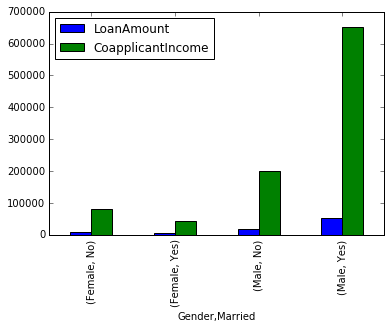

In [73]:
df.plot(kind = 'bar')

In [83]:
un_df1 = df.unstack(level = -1)
un_df1

LoanAmount          CoapplicantIncome               
Married         No      Yes                No            Yes
Gender                                                      
Female      9057.0   4753.0           81601.0   42496.000000
Male       17011.0  52826.0          198826.0  652713.919989

In [84]:
un_df2 = df.unstack(level = 0)
un_df2

LoanAmount          CoapplicantIncome               
Gender      Female     Male            Female           Male
Married                                                     
No          9057.0  17011.0           81601.0  198826.000000
Yes         4753.0  52826.0           42496.0  652713.919989

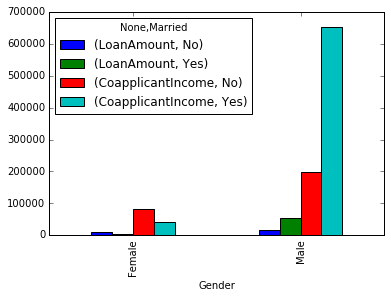

In [86]:
un_df1.plot(kind="bar")

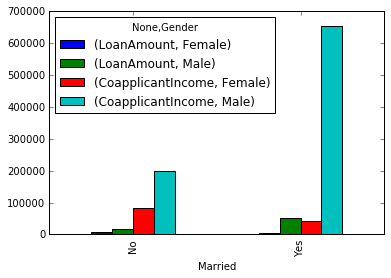

In [87]:
un_df2.plot(kind="bar")

More: [Groupby](http://pandas.pydata.org/pandas-docs/stable/groupby.html) | [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html)